In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
from ensemble import *
from IPython.display import HTML
from matplotlib import animation, rc
%matplotlib notebook

<IPython.core.display.Javascript object>


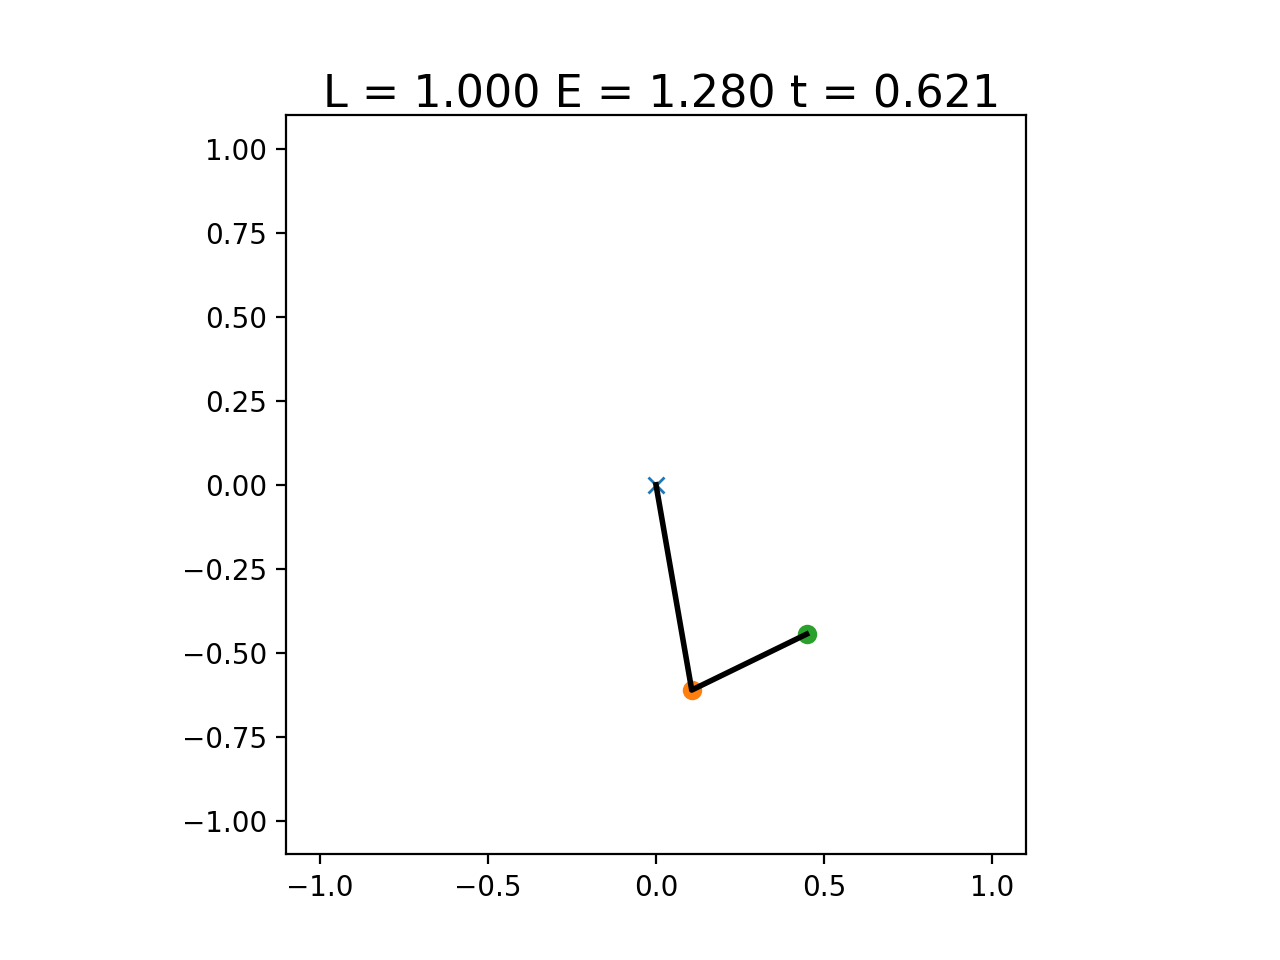

In [2]:
num = 1
epsilon= 1e-3
theta1s = np.array([3.0])
theta2s = np.array([1.0])
phi1s = np.array([0])
phi2s = np.array([0])
theta1sdot = np.array([0])
theta2sdot = np.array([0])
phi1sdot = np.array([0])
phi2sdot = np.array([0])
r = np.array([0.5])
r_dot = np.array([0])

x, v = (theta1s,phi1s,theta2s,phi2s, r), (theta1sdot,phi1sdot,theta2sdot,phi2sdot, r_dot)
x2 = (theta1s + epsilon,phi1s,theta2s,phi2s, r)
v2 = (theta1sdot,phi1sdot + epsilon,theta2sdot,phi2sdot, r_dot)

t = np.linspace(0, 10, num = 500)

state1 = polar2Cartesian(x, v)[0]

traj = solveAstrojax(state1, t)

anim = animate2D(traj, t)

anim

<IPython.core.display.Javascript object>


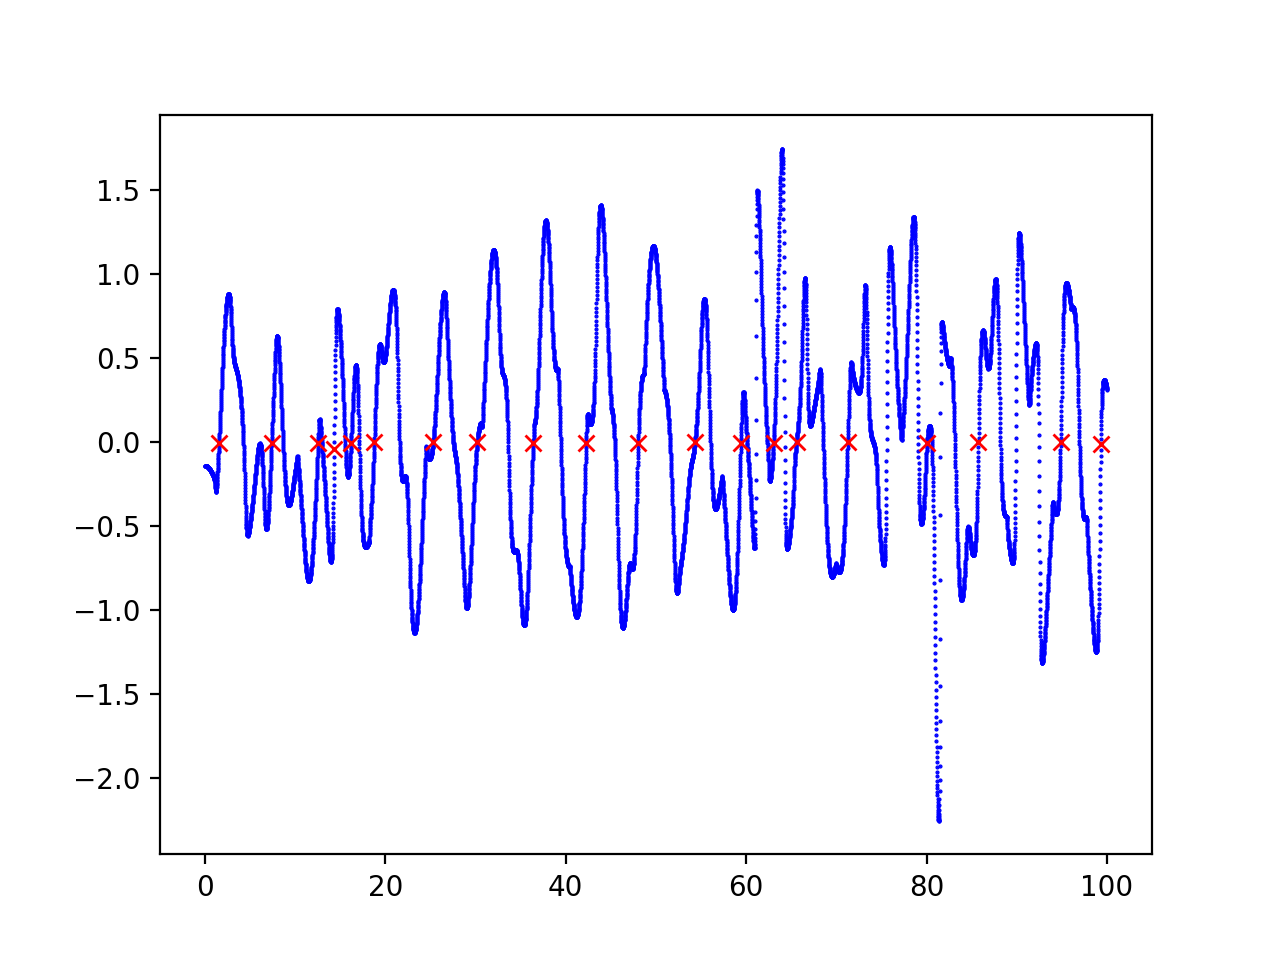

In [4]:
t = np.linspace(0, 100, num = 10000)

state1 = polar2Cartesian(x, v)[0]

traj = solveAstrojax(state1, t)

theta1, theta2, theta1dot, theta2dot,r, r_dot, t1 = Cartesian2Polar(traj, t)
theta1 = theta1 % (2 * np.pi) - np.pi
theta2 = theta2 % (2 * np.pi) - np.pi
# plt.plot(t1, theta1dot, 'g')
plt.plot(t1, theta1, 'b.', markersize = 1)
zero_crossings = np.where(np.diff(np.sign(theta1%(2 * np.pi) - np.pi)))[0]
zero_crossings = zero_crossings[np.abs(theta1[zero_crossings]) < 1]
zero_crossings = zero_crossings[theta1dot[zero_crossings] > 0]
zero_crossings = zero_crossings[r[zero_crossings] > 1e-1]
plt.plot(t1[zero_crossings], theta1[zero_crossings], 'rx')

In [ ]:
theta1s = np.array([3.0]); theta2s = np.array([1.0])
phi1s = np.array([0]); phi2s = np.array([0])
theta1sdot = np.array([0]) ; theta2sdot = np.array([0]); phi1sdot = np.array([0]); phi2sdot = np.array([0])

r = np.array([0.5])
r_dot = np.array([0])

x, v = (theta1s,phi1s,theta2s,phi2s, r), (theta1sdot,phi1sdot,theta2sdot,phi2sdot, r_dot)

t = np.linspace(0, 20000, num = 2000000)

state1 = polar2Cartesian(x, v)[0]

traj = solveAstrojax(state1, t)

theta1, theta2, theta1dot, theta2dot, r, r_dot, t1 = Cartesian2Polar(traj, t)
theta1 = theta1 % (2 * np.pi) - np.pi
theta2 = theta2 % (2 * np.pi) - np.pi
# plt.plot(t1, theta1dot, 'r.')
# plt.plot(t1, theta1, 'b.')
zero_crossings = np.where(np.diff(np.sign(theta1)))[0]
zero_crossings = zero_crossings[np.abs(theta1[zero_crossings]) < 1]
zero_crossings = zero_crossings[theta1dot[zero_crossings] > 0]
zero_crossings = zero_crossings[r[zero_crossings] > 1e-1]

fig, axs = plt.subplots(1, 2, figsize = [4,8])
axs[0].plot(theta2[zero_crossings], theta2dot[zero_crossings], 'k.', markersize = 3)
axs[0].set_xlabel(r'$\theta_2$', fontsize=20)
axs[0].set_ylabel(r'$\dot{\theta}_2$', fontsize=20)
axs[0].set_ylim([-20, 20])
axs[1].plot(r[zero_crossings], r_dot[zero_crossings], 'k.', markersize = 3)

<IPython.core.display.Javascript object>


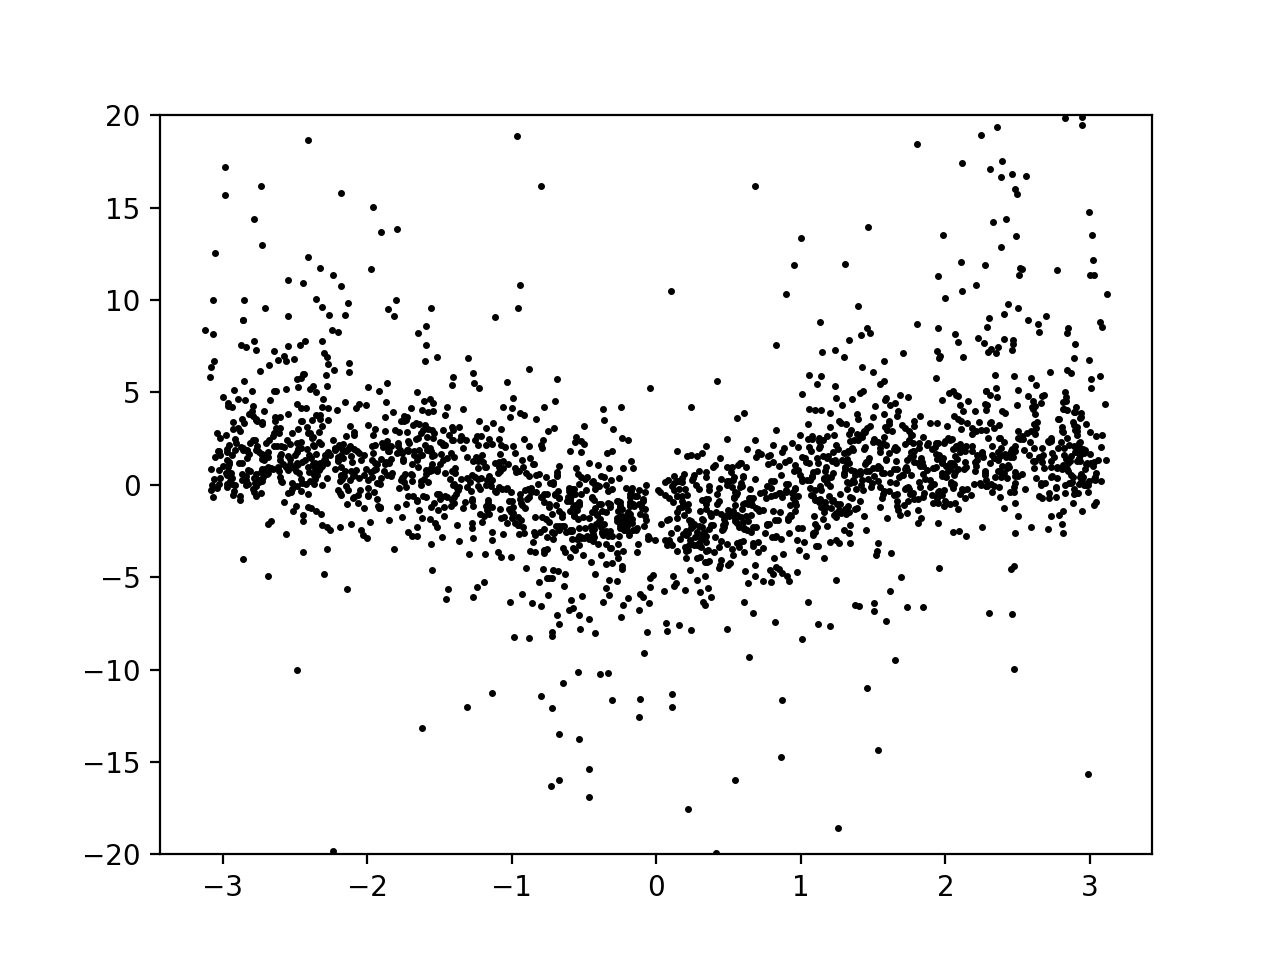

<IPython.core.display.Javascript object>


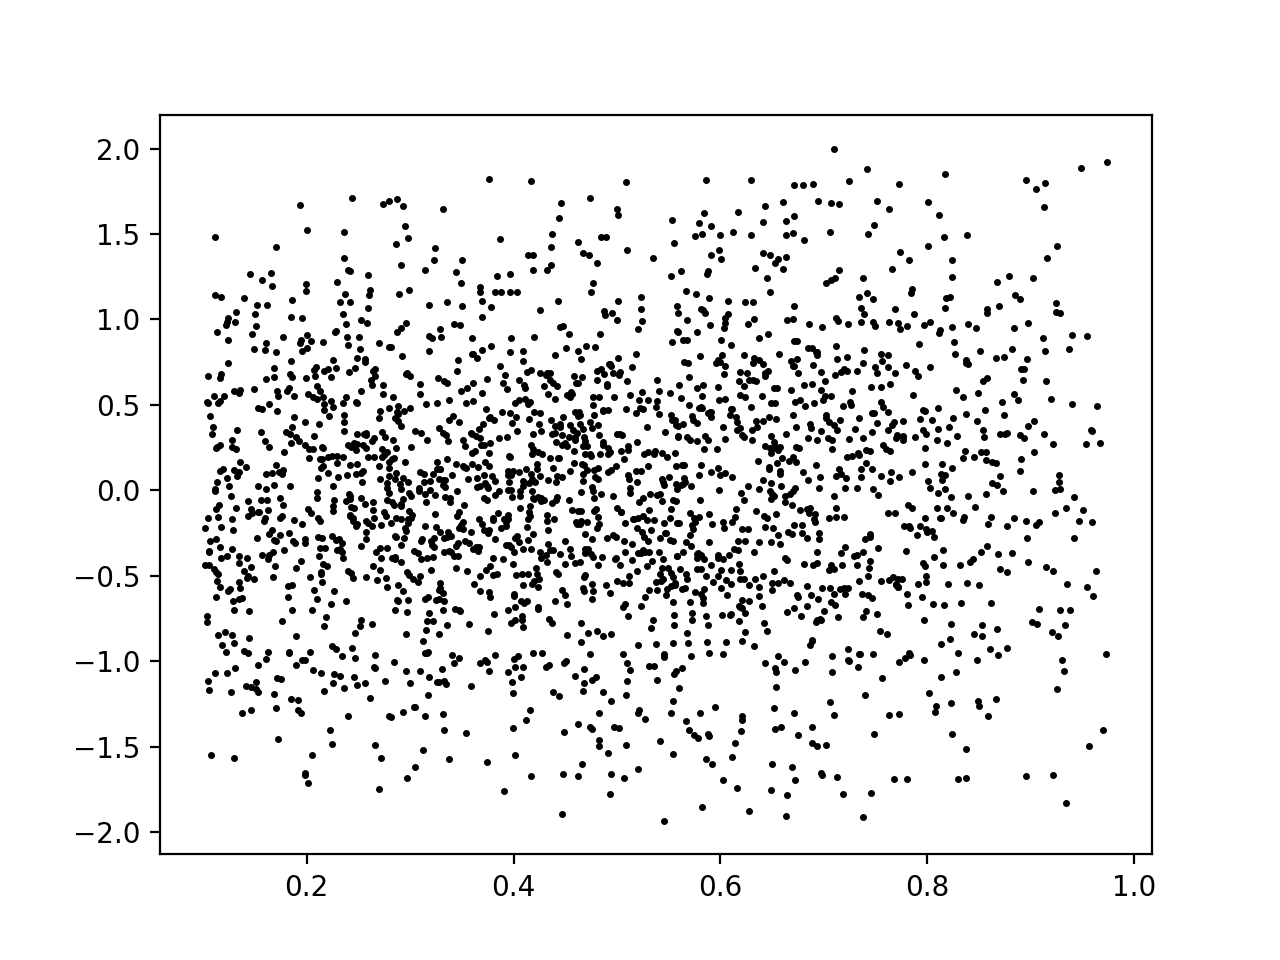

In [6]:
theta1s = np.array([0.2]); theta2s = np.array([3.0])
phi1s = np.array([0]); phi2s = np.array([0])
theta1sdot = np.array([0]) ; theta2sdot = np.array([0]); phi1sdot = np.array([0]); phi2sdot = np.array([0])

r = np.array([0.5])
r_dot = np.array([0])

x, v = (theta1s,phi1s,theta2s,phi2s, r), (theta1sdot,phi1sdot,theta2sdot,phi2sdot, r_dot)

t = np.linspace(0, 10000, num = 1000000)

state1 = polar2Cartesian(x, v)[0]

traj = solveAstrojax(state1, t)

theta1, theta2, theta1dot, theta2dot, r, r_dot, t1 = Cartesian2Polar(traj, t)
theta1 = theta1 % (2 * np.pi) - np.pi
theta2 = theta2 % (2 * np.pi) - np.pi
# plt.plot(t1, theta1dot, 'r.')
# plt.plot(t1, theta1, 'b.')
zero_crossings = np.where(np.diff(np.sign(theta1%(2 * np.pi) - np.pi)))[0]
zero_crossings = zero_crossings[np.abs(theta1[zero_crossings]) < 1]
zero_crossings = zero_crossings[theta1dot[zero_crossings] > 0]
zero_crossings = zero_crossings[r[zero_crossings] > 1e-1]
plt.figure()
plt.plot(theta2[zero_crossings], theta2dot[zero_crossings], 'k.', markersize = 3)
plt.ylim([-20, 20])
plt.figure()
plt.plot(r[zero_crossings], r_dot[zero_crossings], 'k.', markersize = 3)

In [9]:
data = np.load('2Dsample2.npz')
theta1 = data['theta1']
theta2 = data['thetha2']
lyupunov_dat = data['lyupunov']
list(data.keys())
idx = np.argmin(lyupunov_dat)
print(theta1[idx], theta2[idx], lyupunov_dat[idx])

1.4931048653369354 5.89676180994061 -0.07933807120342448


<IPython.core.display.Javascript object>


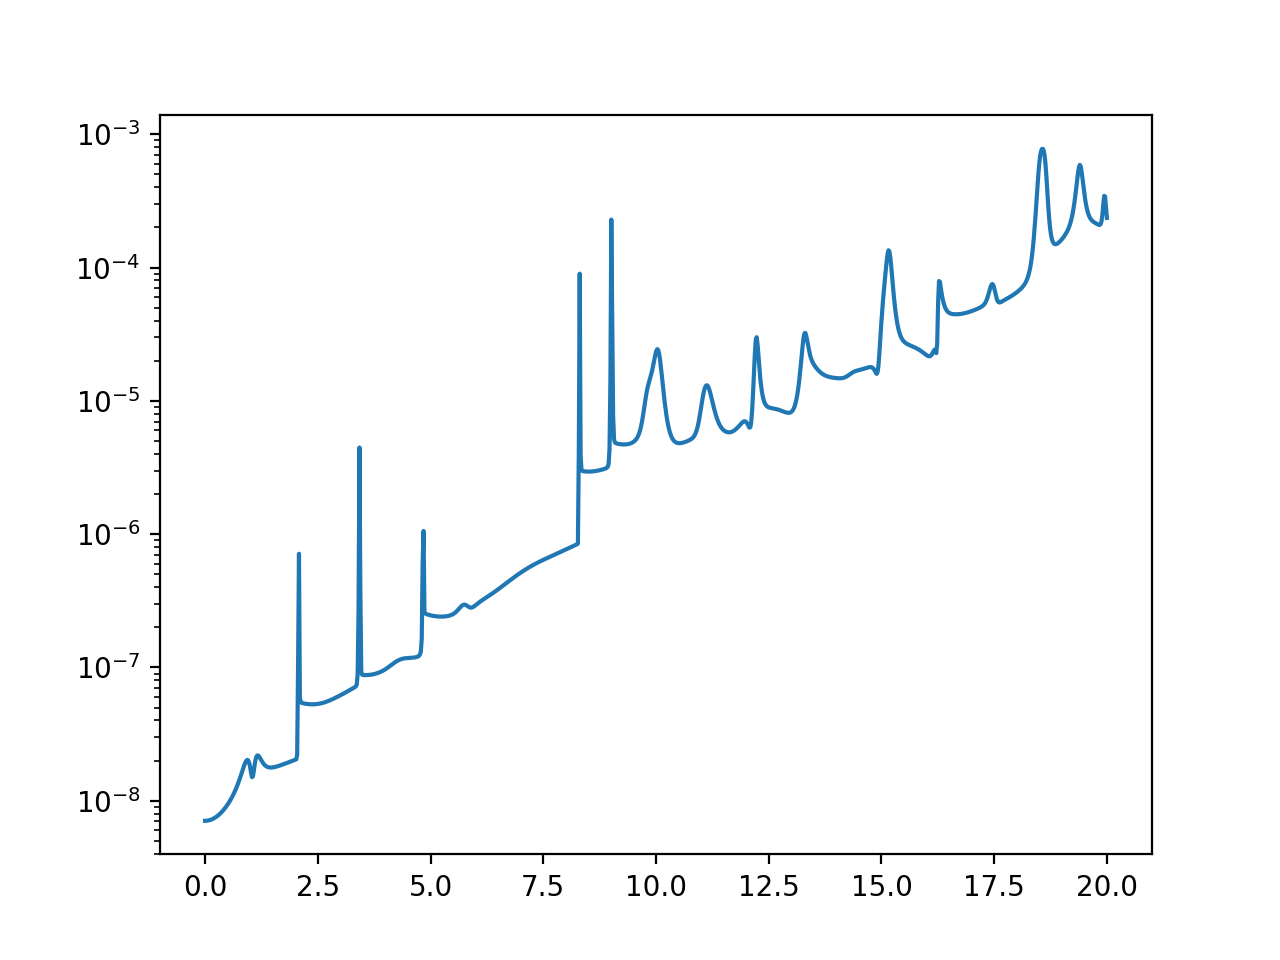

In [31]:
num = 1
epsilon= 1e-8
theta1s = np.array([0.1])
theta2s = np.array([0.5])
phi1s = np.array([0])
phi2s = np.array([0])
theta1sdot = np.array([0])
theta2sdot = np.array([0])
phi1sdot = np.array([0])
phi2sdot = np.array([0])
r = np.array([0.5])
r_dot = np.array([0])

x, v = (theta1s,phi1s,theta2s,phi2s, r), (theta1sdot,phi1sdot,theta2sdot,phi2sdot, r_dot)
x2 = (theta1s + epsilon,phi1s,theta2s,phi2s, r)
v2 = (theta1sdot, phi1sdot,theta2sdot,phi2sdot, r_dot)

t = np.linspace(0, 20, num = 1000)

state1 = polar2Cartesian(x, v)[0]
state2 = polar2Cartesian(x2, v2)[0]

traj1 = solveAstrojax(state1, t)
traj2 = solveAstrojax(state2, t)

diffs = np.sum((traj1[:, :] - traj2[:, :])**2, axis = -1)**0.5

plt.plot(t, diffs)
plt.yscale('log')

<IPython.core.display.Javascript object>


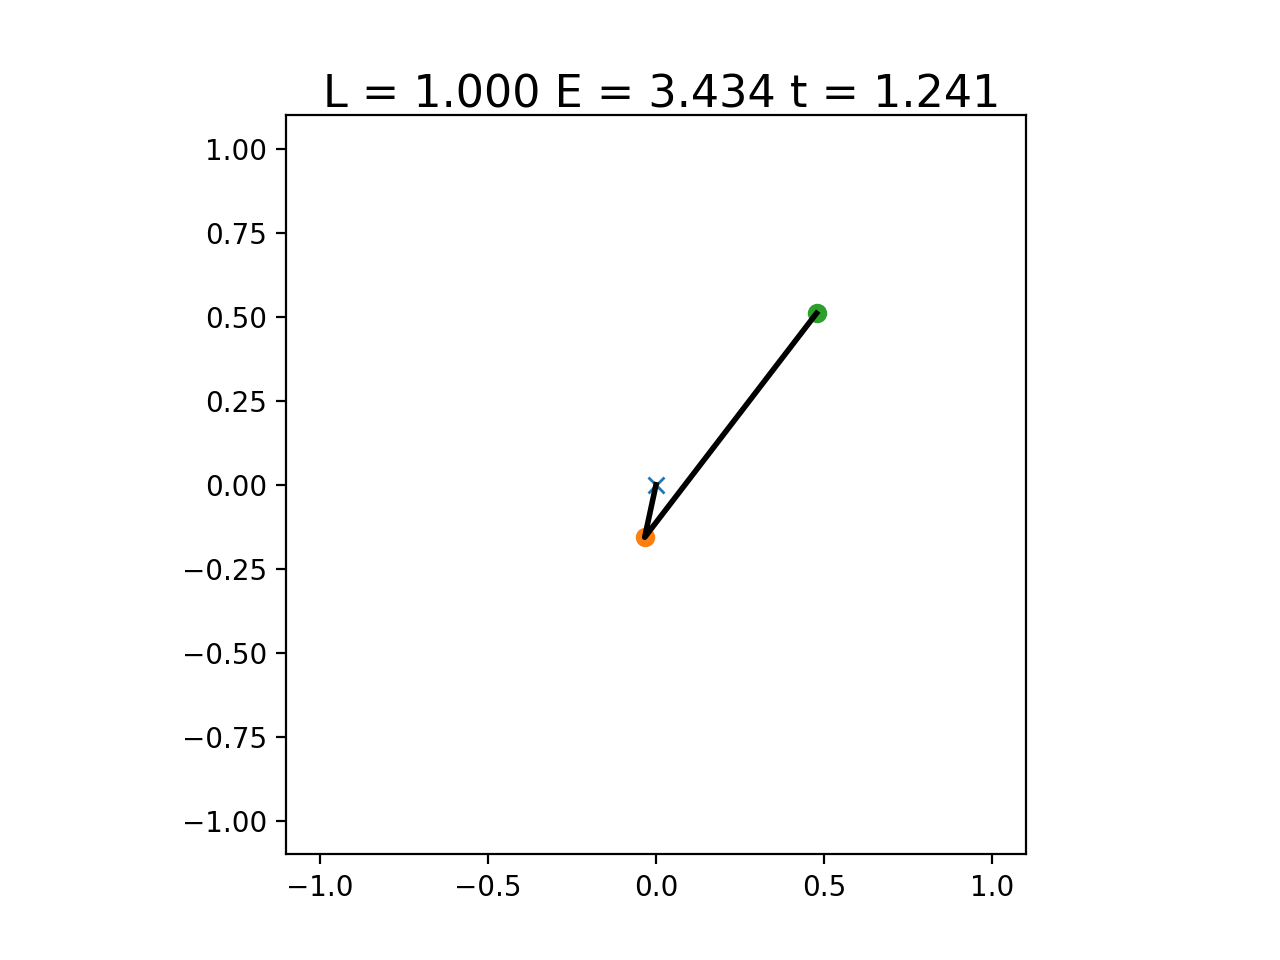

In [32]:
animate2D(traj1, t)

<IPython.core.display.Javascript object>


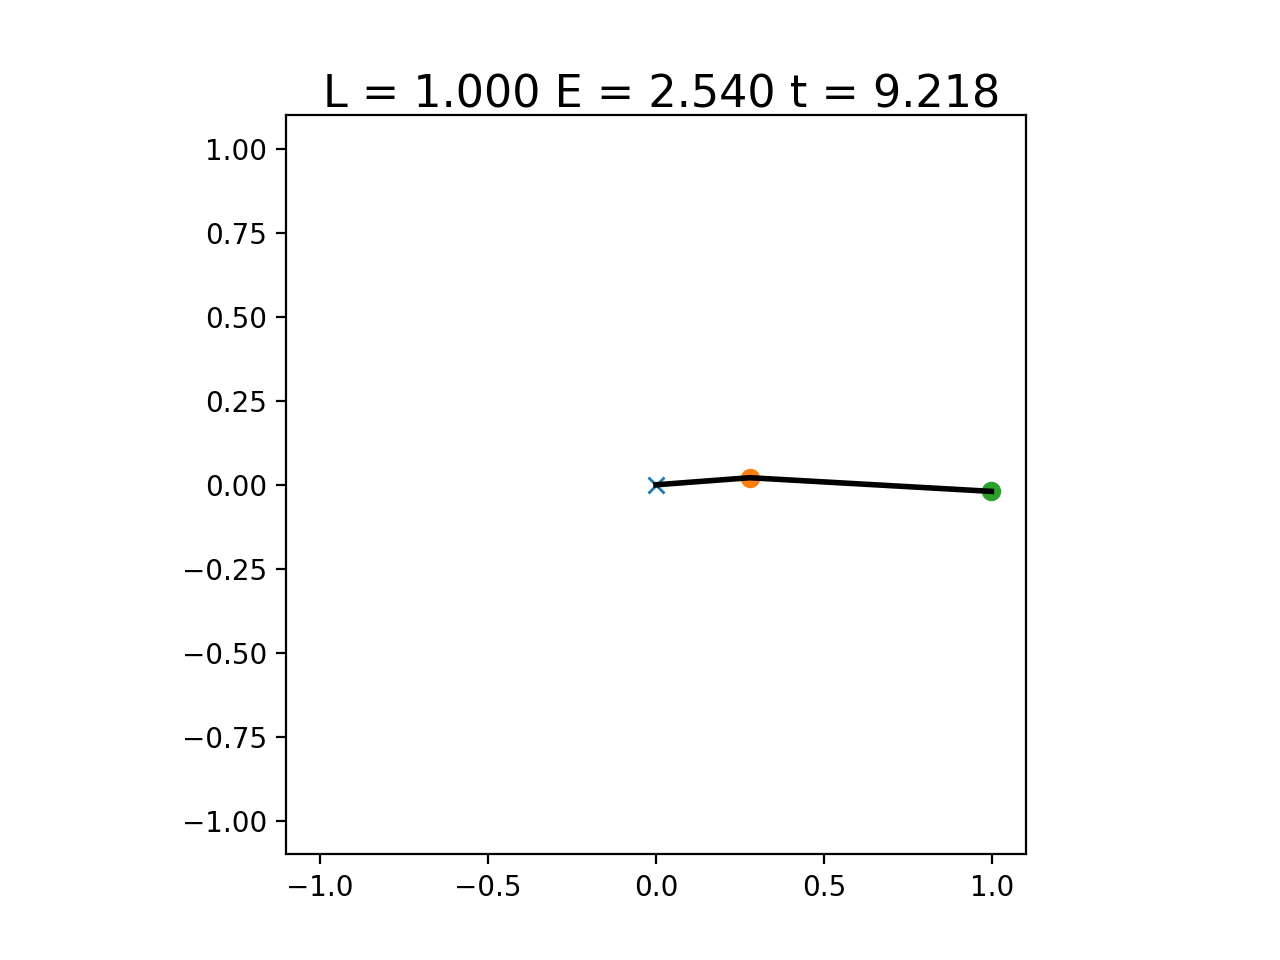

In [21]:
animate2D(traj2, t)

<IPython.core.display.Javascript object>


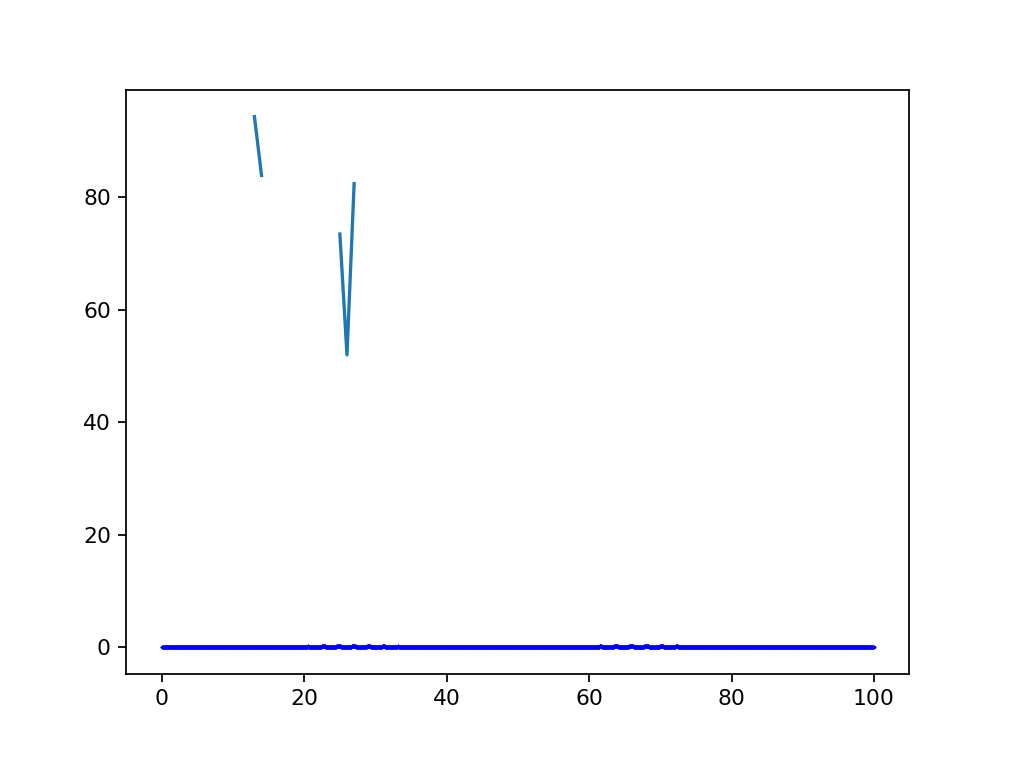

[]


In [57]:
theta1s = np.array([np.pi]); theta2s = np.array([np.pi + 0.1])
phi1s = np.array([0]); phi2s = np.array([0])
theta1sdot = np.array([0]) ; theta2sdot = np.array([0]); phi1sdot = np.array([0]); phi2sdot = np.array([0])
t = np.linspace(0, 100, num = 10000)
x, v = (theta1s,phi1s,theta2s,phi2s, r), (theta1sdot,phi1sdot,theta2sdot,phi2sdot, r_dot)
state1 = polar2Cartesian(x, v)[0]

traj = solveAstrojax(state1, t)

theta1, theta2, theta1dot, theta2dot,r, r_dot, t1 = Cartesian2Polar(traj, t)
theta1_motion = np.abs(theta1 - theta1[0]) 
theta2 = theta2 % (2 * np.pi) - np.pi
# plt.plot(t1, theta1dot, 'g')
plt.plot(t1, theta1_motion, 'b.', markersize = 1)
zero_crossings = np.where(np.diff(np.sign(theta1_motion - 2 * np.pi)))[0]
plt.plot(t1[zero_crossings], theta1_motion[zero_crossings], 'rx')
print(t1[zero_crossings])

7it [00:07,  1.18s/it]/Users/gene/Brown-Class/Juniour-Fall/phys2030/Final Project/code/ensemble.py:65: RuntimeWarning: invalid value encountered in arccos
  theta2 = np.unwrap(np.arccos((traj[:, 5] - traj[:, 2])/(1-r)) * np.sign(traj[:, 3] - traj[:, 0]))
/usr/local/opt/pyenv/versions/cv/lib/python3.7/site-packages/numpy/lib/function_base.py:1520: RuntimeWarning: invalid value encountered in greater
  _nx.copyto(ddmod, pi, where=(ddmod == -pi) & (dd > 0))
/usr/local/opt/pyenv/versions/cv/lib/python3.7/site-packages/numpy/lib/function_base.py:1522: RuntimeWarning: invalid value encountered in less
  _nx.copyto(ph_correct, 0, where=abs(dd) < discont)
100it [01:48,  1.09s/it]


<IPython.core.display.Javascript object>


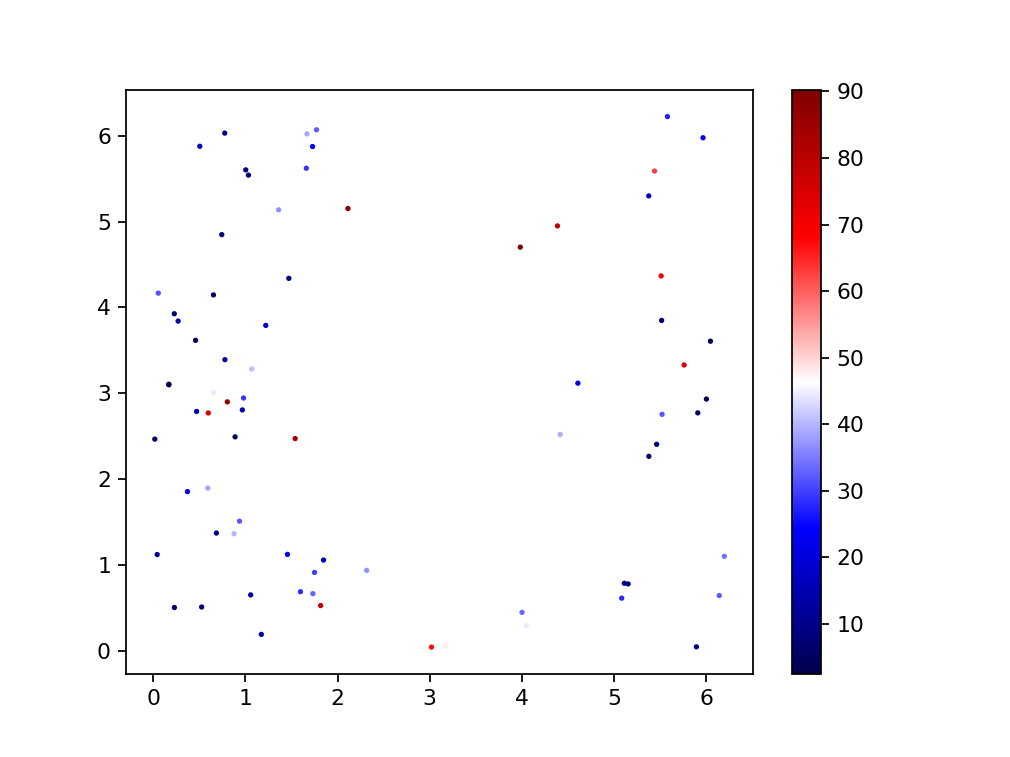

In [77]:
plt.scatter(theta1, theta2, c=flips, s=2, cmap='seismic')
plt.colorbar()

<IPython.core.display.Javascript object>


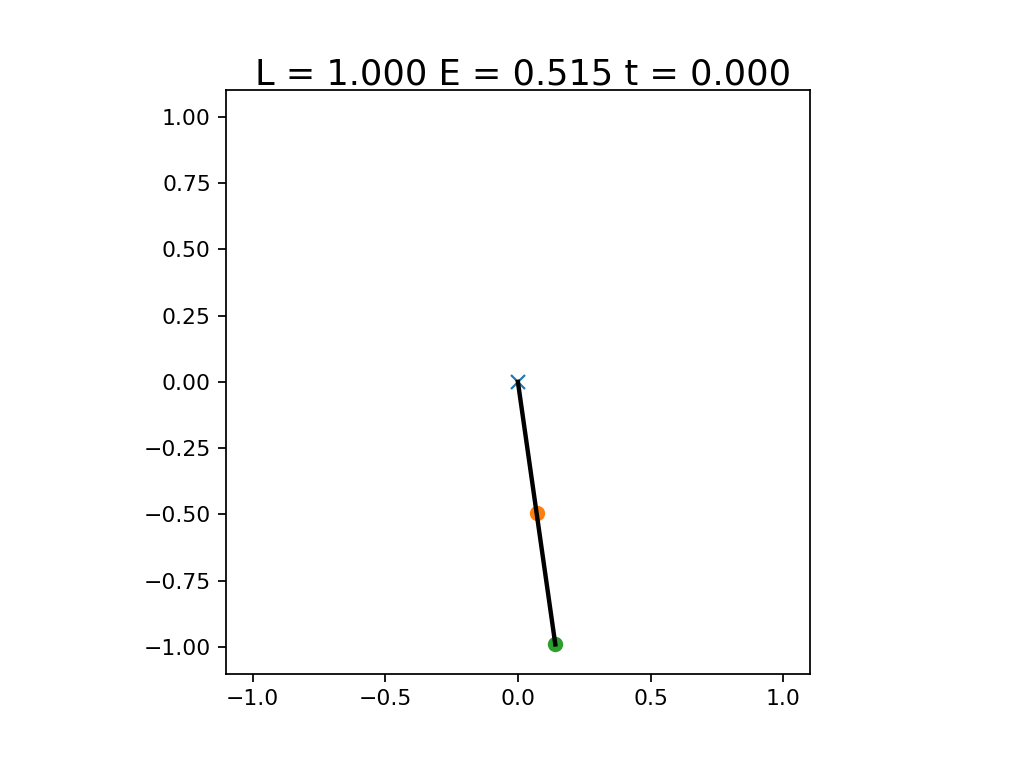

In [78]:
num = 1
epsilon= 1e-3
theta1s = np.array([3.0])
theta2s = np.array([3.0])
phi1s = np.array([0])
phi2s = np.array([0])
theta1sdot = np.array([0])
theta2sdot = np.array([0])
phi1sdot = np.array([0])
phi2sdot = np.array([0])
r = np.array([0.5])
r_dot = np.array([0])

x, v = (theta1s,phi1s,theta2s,phi2s, r), (theta1sdot,phi1sdot,theta2sdot,phi2sdot, r_dot)
x2 = (theta1s + epsilon,phi1s,theta2s,phi2s, r)
v2 = (theta1sdot,phi1sdot + epsilon,theta2sdot,phi2sdot, r_dot)

t = np.linspace(0, 10, num = 500)

state1 = polar2Cartesian(x, v)[0]

traj = solveAstrojax(state1, t)

anim = animate2D(traj, t)

anim